In [83]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [84]:
df = pd.read_csv('data/Players.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3922 entries, 0 to 3921
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       3921 non-null   object 
 1   height       3921 non-null   float64
 2   weight       3921 non-null   float64
 3   collage      3573 non-null   object 
 4   born         3921 non-null   float64
 5   birth_city   3452 non-null   object 
 6   birth_state  3439 non-null   object 
dtypes: float64(3), object(4)
memory usage: 245.1+ KB


In [85]:
df.dropna(axis = 0, how = 'all', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3921
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       3921 non-null   object 
 1   height       3921 non-null   float64
 2   weight       3921 non-null   float64
 3   collage      3573 non-null   object 
 4   born         3921 non-null   float64
 5   birth_city   3452 non-null   object 
 6   birth_state  3439 non-null   object 
dtypes: float64(3), object(4)
memory usage: 245.1+ KB


In [86]:
#заповнюємо прощені значення

df['collage'].fillna('Missing data', inplace = True)
df['birth_city'].fillna(method = 'ffill', inplace = True)
df['birth_state'].fillna(method = 'ffill', inplace = True)
df.dropna(axis = 0, how = 'any', inplace = True)   # на початку можуть бути пропуски 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 1 to 3921
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       3920 non-null   object 
 1   height       3920 non-null   float64
 2   weight       3920 non-null   float64
 3   collage      3920 non-null   object 
 4   born         3920 non-null   float64
 5   birth_city   3920 non-null   object 
 6   birth_state  3920 non-null   object 
dtypes: float64(3), object(4)
memory usage: 245.0+ KB


<AxesSubplot:>

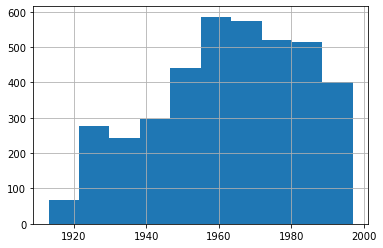

In [87]:
df['born'].hist()

In [88]:
# надамо категорію по року народження
df['born_group'] = pd.cut(df['born'], range(1910, 2011, 10), right = False)
df

,Player,height,weight,collage,born,birth_city,birth_state,born_group
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,"[1920, 1930)"
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,Yorktown,Indiana,"[1920, 1930)"
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,Yorktown,Indiana,"[1920, 1930)"
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,"[1920, 1930)"
5,Gene Berce,180.0,79.0,Marquette University,1926.0,Hardinsburg,Kentucky,"[1920, 1930)"
...,...,...,...,...,...,...,...,...
3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina,"[1960, 1970)"
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon,"[1990, 2000)"
3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee,"[1990, 2000)"
3920,Paul Zipser,203.0,97.0,Missing data,1994.0,Heidelberg,Germany,"[1990, 2000)"


In [89]:
df['h/w'] = df['height'] / df['weight']

In [90]:
df.insert(4, 'collage_code', LabelEncoder().fit_transform(df['collage']))

In [91]:
df.insert(7, 'city_code', pd.Categorical(df['birth_city'], ordered = False).codes)
df

,Player,height,weight,collage,collage_code,born,birth_city,city_code,birth_state,born_group,h/w
1,Cliff Barker,188.0,83.0,University of Kentucky,312,1921.0,Yorktown,1255,Indiana,"[1920, 1930)",2.265060
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,342,1924.0,Yorktown,1255,Indiana,"[1920, 1930)",2.244186
3,Ed Bartels,196.0,88.0,North Carolina State University,190,1925.0,Yorktown,1255,Indiana,"[1920, 1930)",2.227273
4,Ralph Beard,178.0,79.0,University of Kentucky,312,1927.0,Hardinsburg,447,Kentucky,"[1920, 1930)",2.253165
5,Gene Berce,180.0,79.0,Marquette University,157,1926.0,Hardinsburg,447,Kentucky,"[1920, 1930)",2.278481
...,...,...,...,...,...,...,...,...,...,...,...
3917,Troy Williams,198.0,97.0,South Carolina State University,243,1969.0,Columbia,223,South Carolina,"[1960, 1970)",2.041237
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,108,1992.0,Portland,897,Oregon,"[1990, 2000)",1.925926
3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",332,1996.0,Hendersonville,474,Tennessee,"[1990, 2000)",1.972222
3920,Paul Zipser,203.0,97.0,Missing data,170,1994.0,Heidelberg,469,Germany,"[1990, 2000)",2.092784


In [92]:
df.insert(9, 'state_code', LabelEncoder().fit_transform(df['birth_state']))
df

,Player,height,weight,collage,collage_code,born,birth_city,city_code,birth_state,state_code,born_group,h/w
1,Cliff Barker,188.0,83.0,University of Kentucky,312,1921.0,Yorktown,1255,Indiana,46,"[1920, 1930)",2.265060
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,342,1924.0,Yorktown,1255,Indiana,46,"[1920, 1930)",2.244186
3,Ed Bartels,196.0,88.0,North Carolina State University,190,1925.0,Yorktown,1255,Indiana,46,"[1920, 1930)",2.227273
4,Ralph Beard,178.0,79.0,University of Kentucky,312,1927.0,Hardinsburg,447,Kentucky,55,"[1920, 1930)",2.253165
5,Gene Berce,180.0,79.0,Marquette University,157,1926.0,Hardinsburg,447,Kentucky,55,"[1920, 1930)",2.278481
...,...,...,...,...,...,...,...,...,...,...,...,...
3917,Troy Williams,198.0,97.0,South Carolina State University,243,1969.0,Columbia,223,South Carolina,104,"[1960, 1970)",2.041237
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,108,1992.0,Portland,897,Oregon,88,"[1990, 2000)",1.925926
3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",332,1996.0,Hendersonville,474,Tennessee,111,"[1990, 2000)",1.972222
3920,Paul Zipser,203.0,97.0,Missing data,170,1994.0,Heidelberg,469,Germany,37,"[1990, 2000)",2.092784
